THIS IS THE FINAL PART OF THE PROJECT. HEREIN, WE FIT THE MODELS USING ONLY A SECTION OF THE FEATURES IN OUR
PREPROCESSED DATASET; WE INTEND TO EVALUATE THE EFFECT OF ANY OF THE ELIMINATED FEATURES ON THE PERFORMANCE OF THE MODEL.

WE WILL STILL USE THE TEST SIZE METRIC TO AS WELL ASSESS THE EFFECT OF TEST DATA ON THE PERFORMANCE OF OUR MODEL.

RESULTS FOR EACH TEST SIZE ARE DISPLAYED IN THE LAST CELL OF THE NOTEBOOK.

In [68]:
#loading requisite libraries for this step of the project
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
#setting default values for visualizations
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 10)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [70]:
#loading the preprocessed dataset from step I
df_1 = pd.read_csv('../datasets/synthesized_diabetes_data.csv')

EXPLORING THE DATA

In [71]:
df_1

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,...,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,height_meters,BMI,hip_waist_ratio,diabetic
0,0,203.0,27,56.0,3.6,4.310000,0,27,0,62.0,...,59.0,152.382979,92.524823,29.0,38.0,720.0,1.5748,48.790420,0.763158,0
1,1,165.0,42,24.0,6.9,4.440000,0,10,0,64.0,...,68.0,152.382979,92.524823,46.0,48.0,360.0,1.6256,82.495282,0.958333,0
2,2,228.0,37,37.0,6.2,4.640000,0,39,0,61.0,...,92.0,185.000000,92.000000,49.0,57.0,180.0,1.5494,106.638214,0.859649,0
3,3,78.0,38,12.0,6.5,4.630000,0,48,1,67.0,...,50.0,152.382979,92.524823,33.0,38.0,480.0,1.7018,41.089412,0.868421,0
4,4,249.0,35,28.0,8.9,7.720000,0,45,1,68.0,...,80.0,152.382979,92.524823,44.0,41.0,300.0,1.7272,61.343116,1.073171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,398,296.0,113,46.0,6.4,16.110001,1,34,1,69.0,...,94.0,130.000000,94.000000,35.0,39.0,210.0,1.7526,56.322314,0.897436,1
399,399,284.0,34,54.0,5.3,4.390000,1,32,0,63.0,...,100.0,146.000000,102.000000,32.0,43.0,180.0,1.6002,60.141214,0.744186,0
400,400,194.0,105,38.0,5.1,13.630000,1,10,0,69.0,...,70.0,152.382979,92.524823,33.0,40.0,20.0,1.7526,54.368939,0.825000,1
401,401,199.0,21,52.0,3.8,4.490000,1,22,0,63.0,...,78.0,152.382979,92.524823,41.0,48.0,255.0,1.6002,76.933890,0.854167,0


In [72]:
df_1.shape

(403, 23)

In [73]:
df_1.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic'],
      dtype='object')

In [74]:
df_1.isnull().values.any()

False

In [75]:
df_1.isnull().sum().sum()

0

In [76]:
df_1.columns

Index(['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'location', 'age',
       'gender', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic'],
      dtype='object')

In [101]:
#selecting columns to be used for correlation analysis
#selection of some of these features is based on the visualization in Step I - feautures that had no meaningful distribution
# are eliminated at this point
corr_cols = ['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age',
       'gender', 'height', 'weight', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'height_meters', 'BMI',
       'hip_waist_ratio', 'diabetic']

Text(0.5, 1.0, 'Correlation Matrix')

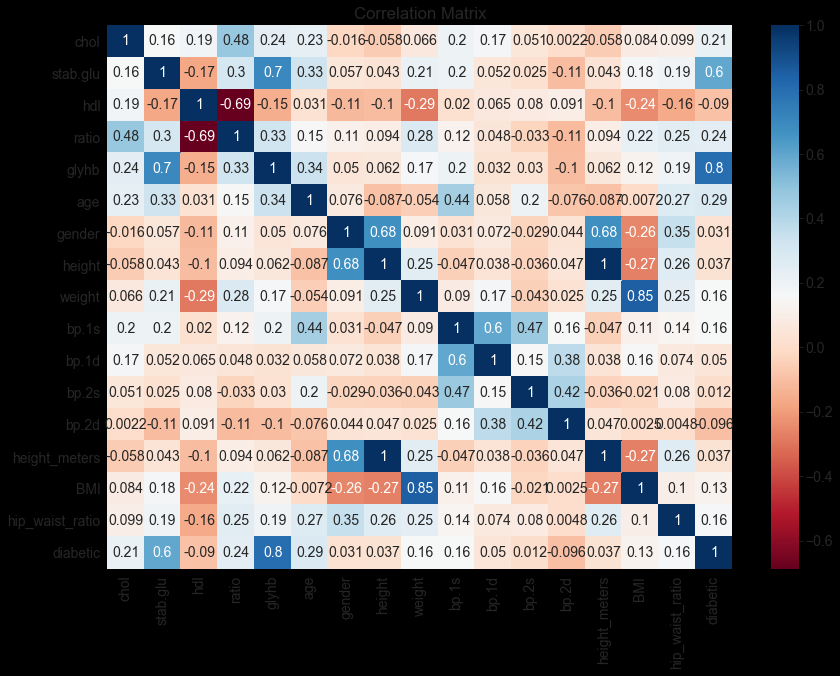

In [102]:
#a correlation heatmap for the selected features. 
sns.heatmap(df_1[corr_cols].corr(), cmap='RdBu', annot=True)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

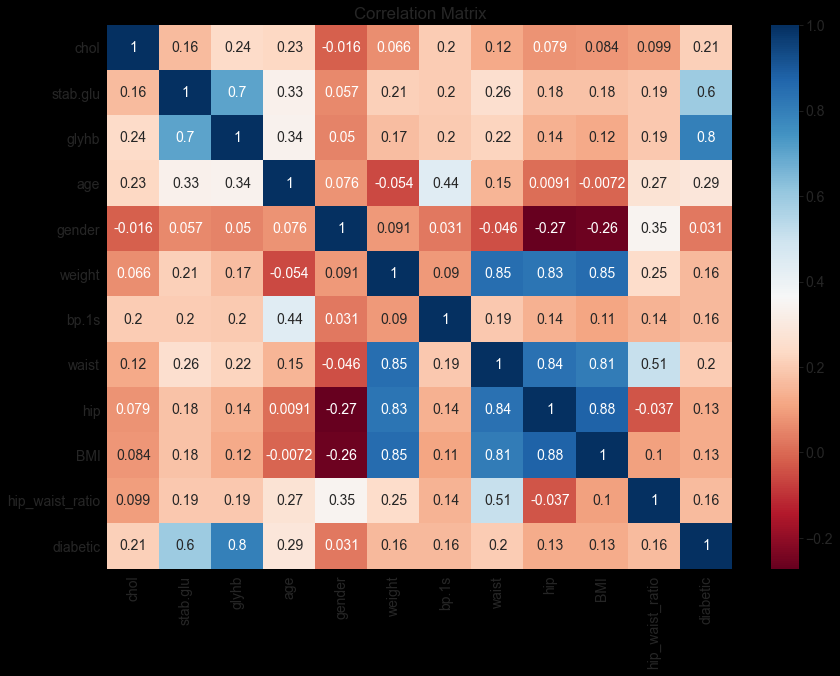

In [104]:
#here we create a second heat map based on the first heatmap - here we select features that a show a 
# higher positive correlation to our target feature.
cor_2_cols = ['chol', 'stab.glu', 'glyhb', 'age',
       'gender', 'weight', 'bp.1s', 'waist', 'hip', 'BMI',
       'hip_waist_ratio', 'diabetic']

sns.heatmap(df_1[cor_2_cols].corr(), cmap='RdBu', annot=True)
plt.title('Correlation Matrix')

In [88]:
#the final selected features are now seprated into the inputs and targets
# as in Step II, diabetics remains to be our target feature for this Step II
train_cols = ['chol', 'stab.glu', 'glyhb', 'age',
       'gender', 'weight', 'bp.1s', 'waist', 'hip', 'BMI',
       'hip_waist_ratio']

x = df_1[train_cols]
y = df_1['diabetic']

In [105]:
#splitting the dataset into traning and testing datasets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [106]:
#scaling the dataset to reduce dimensionality and for easier and faster training
x_train_scaled =  StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

In [107]:
#an auto-training function for the three models
def auto_train(x, y, model_alg):
    if model_alg == 'rf':
        model = RandomForestClassifier(random_state=30, n_estimators=100, max_features=8, max_depth=20)
    elif model_alg == 'svm':
        model = SVC(C=1, kernel='rbf', random_state=1)
    elif model_alg == 'xgb':
        model = XGBClassifier(use_label_encoder=False, objective='binary:hinge', colsample_bytree=0.8)
        
    model.fit(x_train_scaled, y_train)
    
    return model

In [108]:
#an evaluation function for the three models.
def auto_evaluate(model, x, y):
    
    predicted = model.predict(x)
    
    mae = mean_absolute_error(y, predicted)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    rac = roc_auc_score(y, predicted)
    clas = classification_report(y, predicted)
    
    return [mae, rmse, rac, clas]

In [109]:
#fitting and training the models using a function call
random_forest = auto_train(x_train_scaled, y_train, 'rf')
svm = auto_train(x_train_scaled, y_train, 'svm')
gradient_boost = auto_train(x_train_scaled, y_train, 'xgb')

In [110]:
#model outputs; SVM
svm_output = auto_evaluate(svm, x_test_scaled, y_test)
svm_output

[0.0743801652892562,
 0.2727272727272727,
 0.8125,
 '              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96        97\n           1       1.00      0.62      0.77        24\n\n    accuracy                           0.93       121\n   macro avg       0.96      0.81      0.86       121\nweighted avg       0.93      0.93      0.92       121\n']

In [111]:
#model outputs; RF
random_forest_output = auto_evaluate(random_forest, x_test_scaled, y_test)
random_forest_output

[0.049586776859504134,
 0.22268088570756164,
 0.875,
 '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        97\n           1       1.00      0.75      0.86        24\n\n    accuracy                           0.95       121\n   macro avg       0.97      0.88      0.91       121\nweighted avg       0.95      0.95      0.95       121\n']

In [112]:
#model outputs; XGB
xgb_output = auto_evaluate(gradient_boost, x_test_scaled, y_test)
xgb_output

[0.049586776859504134,
 0.22268088570756164,
 0.875,
 '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97        97\n           1       1.00      0.75      0.86        24\n\n    accuracy                           0.95       121\n   macro avg       0.97      0.88      0.91       121\nweighted avg       0.95      0.95      0.95       121\n']

AS SEEN, AND IN COMPARISON TO STEPP II, THE MODELS STILL MAINTAIN A RELATIVELY GOOD PERFORMANCE. 

NOTABLE IMPROVEMENT ON THE SCORING OF THE SVM MODEL IS SEEN; AS IT SCORES HIGHER ON ALL THE THREE EVALUATION METRICS USED FOR ASSESSING THE MODELS.

THE CHANGE IN THE SIZE OF THE TESTING DATASET DID HAVE SMALL NOTABLE IMPROVEMENTS ON THE SCORING OF ALL THE MODELS; THIS IS ALSO AS SEEN IN PART OF II. HOWEVER, IN THIS PART, THE SCORING IS SLIGHTLY HIGHER COMPARED TO THE SCORING IN PART II.

FURTHER FEATURE ENGINEERING AND MORE VARRIED FEATURED COULD BE POSSIBLE WAYS OF TWEAKING THE PERFORMANCE OF THE MODELS.

AS DISCUSSED IN PART II, THE XGB MODEL IS MORE BEST SUITED FOR THIS KIND OF PROBLEM AS IT HAS A BETTER SCORING-EVALUATION ARCHITECTURE COMPARED TO THE RF MODEL. HOWEVER, [FURTHER] HYPERPARAMETER TUNING TO CAN HELP ELEVATE ONE MODEL OVER THE OTHER FOR A MORE BEFITTING CHOICE. 


sample = 0.3 (30% testing data) <>=======================<>

ROOT MEAN SQUARED EVALUATION METRIC

[Rmse (rf) = 0.222, rmse (xgb) = 0.222, rmse (svm) = 0.272]


ROC-AUC EVALUATION METRIC

[Roc-auc(rf) = 0.875, roc-auc(xgb)=0.875, roc-auc (svm) = 0.791]

CLASSIFICATION ACCURACY EVALUATION METRIC [RECALL, PRECISION, F1 SCORE]

[Accuracy (rf) = 95%, Accuracy (xgb) = 95%, Accuracy(svm) = 93%]

Recall (TP/TP+FN) ===> SVM = , RF = , XGB = 
Precision (TP/TP+FP) ===> SVM = , RF = , XGB =

sample = 0.2 (20% testing data)  <>========================<>

ROOT MEAN SQUARED EVALUATION METRIC

[Rmse (rf) = 0.222, rmse (xgb) = 0.222, rmse (svm) = 0.314]

ROC-AUC EVALUATION METRIC

[Roc-auc(rf) = 0.875, roc-auc(xgb)=0.882, roc-auc (svm) = 0.794]

CLASSIFICATION ACCURACY EVALUATION METRIC [RECALL, PRECISION, F1 SCORE]

[Accuracy (rf) = 95%, Accuracy (xgb) = 95%, Accuracy(svm) = 90%]

Recall (TP/TP+FN) ===>  SVM = , RF = , XGB =
Precision (TP/TP+FP) ===> SVM = , RF = , XGB =
